# Student Performance in Math

Predict student performance in secondary education (high school).

At least four articles on this project, I determine what methods they use, how they achieve results with those methods, and how I can compare them with my own projects.

- Machine Learning Based Student Academic Performance Prediction [[1]](https://ieeexplore.ieee.org/document/9544538)
- Comparative performance analysis of K-nearest neighbour (KNN) algorithm and its different variants for disease prediction [[2]](https://www.researchgate.net/publication/359978380_Comparative_performance_analysis_of_K-nearest_neighbour_KNN_algorithm_and_its_different_variants_for_disease_prediction)
- Student course grade prediction using the random forest algorithm: Analysis of predictors' importance [[3]](https://doi.org/10.1016/j.tine.2023.100214)
- STUDENT ACADEMIC PERFORMANCE PREDICTION USING SUPPORT VECTOR MACHINE [[4]](https://www.researchgate.net/publication/332864818_STUDENT_ACADEMIC_PERFORMANCE_PREDICTION_USING_SUPPORT_VECTOR_MACHINE)

Therefore, when these articles are examined, using ML algorithms such as Random Forest, KNN, and SVM can provide us with more reliable results.

## Load libraries

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import mutual_info_score, accuracy_score, precision_score, recall_score, f1_score

## Datasets

Attributes for both `student-mat.csv` (Math course) and `student-por.csv` (Portuguese language course) datasets:

1. `school` - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. `sex` - student's sex (binary: "F" - female or "M" - male)
3. `age` - student's age (numeric: from 15 to 22)
4. `address` - student's home address type (binary: "U" - urban or "R" - rural)
5. `famsize` - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. `Pstatus` - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. `Medu` - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. `Fedu` - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. `Mjob` - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. `Fjob` - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. `reason` - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. `guardian` - student's guardian (nominal: "mother", "father" or "other")
13. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
16. `schoolsup` - extra educational support (binary: yes or no)
17. `famsup` - family educational support (binary: yes or no)
18. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. `activities` - extra-curricular activities (binary: yes or no)
20. `nursery` - attended nursery school (binary: yes or no)
21. `higher` - wants to take higher education (binary: yes or no)
22. `internet` - Internet access at home (binary: yes or no)
23. `romantic` - with a romantic relationship (binary: yes or no)
24. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
26. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
27. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. `health` - current health status (numeric: from 1 - very bad to 5 - very good)
30. `absences` - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

31. `G1` - first period grade (numeric: from 0 to 20)
32. `G2` - second period grade (numeric: from 0 to 20)
33. `G3` - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets


In [2]:
df_mat = pd.read_csv("../data/student-mat.csv", sep=";")
df_por = pd.read_csv("../data/student-por.csv", sep=";")
df = pd.concat([df_mat, df_por], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In this project, I will use the `student-mat.csv` dataset to predict student performance in the Math course. The target variable will be `G3`, the final grade.

In [11]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Based on the UCI repo also it shows above, the data has no missing values. So, there is no need for missing value treatment, but let's check it anyway.

In [12]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Let's check the statistics descriptive of the dataset to understand it better, particularly the target variable `G3`. Is it true that the final grade is between 0 and 20?

In [13]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [37]:
# lowering column names
df_mat.columns = [col.lower() for col in df_mat.columns]

categorical_cols = df_mat.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_mat.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [19]:
numerical_cols

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3']

Based on the datasets information, the nominal can be seen as categorical data, and binary data can also be treated as categorical data. Therefore, I will convert all nominal and binary data into categorical data types for better analysis and modeling.

In [64]:
nominal_cols = ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health']
for col in nominal_cols:
    df_mat[col] = df_mat[col].astype('object')

## EDA

### Distribution of final grade (`G3`)

Text(0.5, 1.0, 'Distribution of Final Grades (G3) in Math Course')

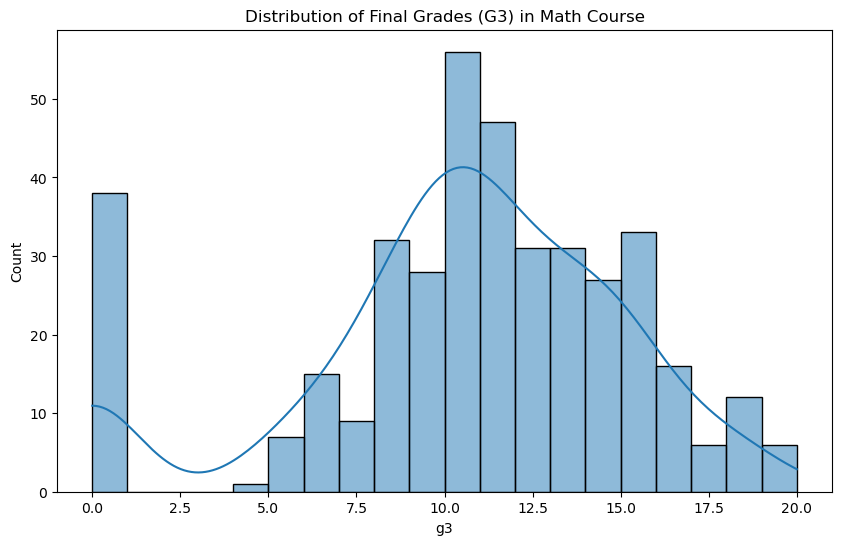

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_mat['g3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3) in Math Course')

In total, there are 395 students in the Math course dataset. The average final grade `G3` is approximately `10.42`, with a standard deviation of about `4.58`. The minimum final grade is `0`, and the maximum is `20`, confirming that the grades indeed range from 0 to 20.

### Correlation matrix for numeric features

The possible numeric features in the dataset may be only `age`, `g1`, `g2`, and `g3` (final grade)

In [47]:
corr_mtx = df_mat[['age', 'absences', 'g1', 'g2', 'g3']].corr()
corr_mtx.style.background_gradient(cmap='coolwarm')

,age,absences,g1,g2,g3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
g1,-0.064081,-0.031003,1.000000,0.852118,0.801468
g2,-0.143474,-0.031777,0.852118,1.000000,0.904868
g3,-0.161579,0.034247,0.801468,0.904868,1.000000


The target attribute `g3` has a strong correlation with attributes `g2` and `g1`. This occurs because `g3` is the final year grade (issued at the 3rd period), while `g1` and `g2` correspond to the 1st and 2nd period grades. It is more difficult to predict `g3` without `g2` and `g1`, but such prediction is much more useful

### Numeric features distribution

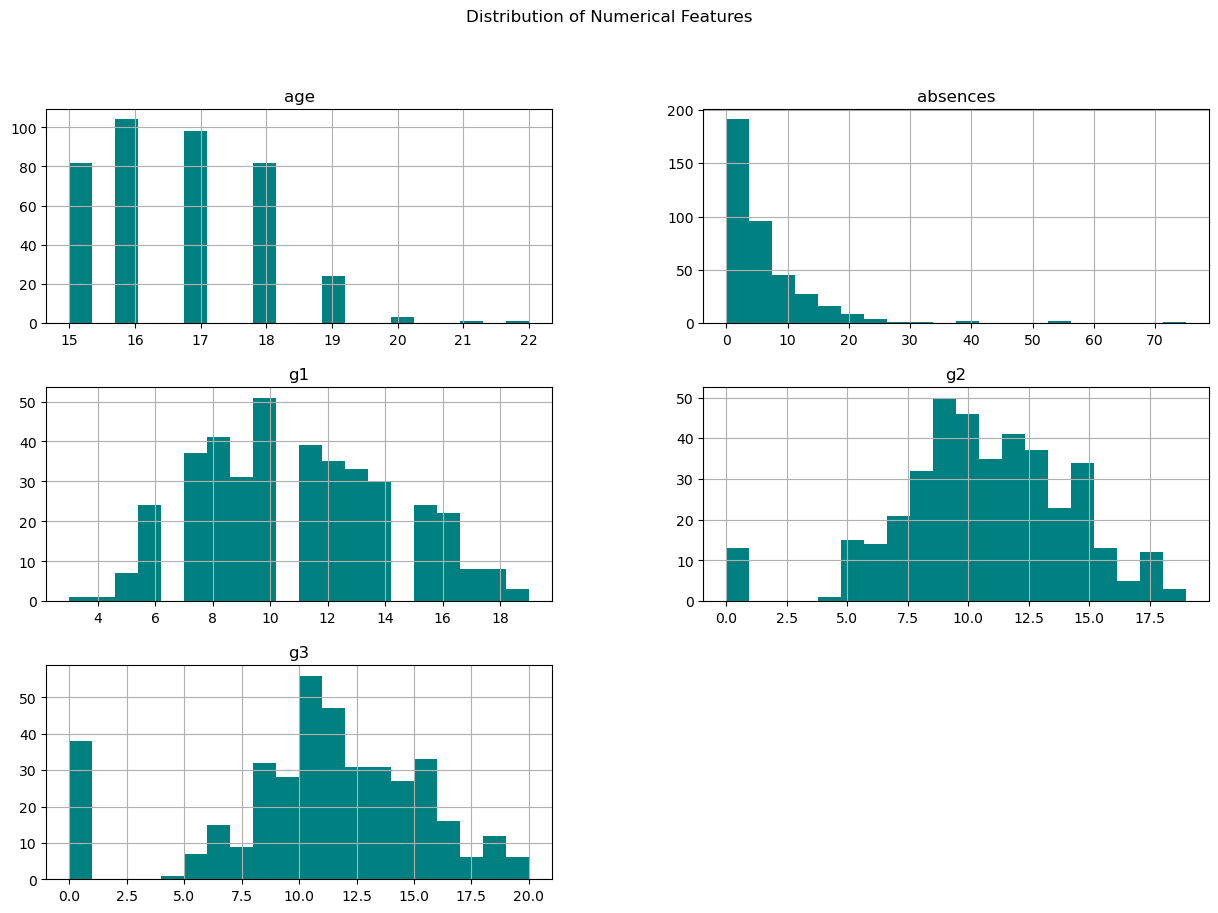

In [48]:
df_mat[['age', 'absences', 'g1', 'g2', 'g3']].hist(figsize=(15, 10), bins=20, color='teal')
plt.suptitle("Distribution of Numerical Features", fontsize=12)
plt.show()

### Categorical features distribution

I need to mapping the nominal features to categorical features for better visualization and analysis.

In [73]:
medu_map = {
    0: 'none',
    1: 'primary education (4th grade)',
    2: '5th to 9th grade',
    3: 'secondary education',
    4: 'higher education'
}

fedu_map = {
    0: 'none',
    1: 'primary education (4th grade)',
    2: '5th to 9th grade',
    3: 'secondary education',
    4: 'higher education'
}

travel_time_map = {
    1: '<15 min',
    2: '15 to 30 min',
    3: "30 min to 1 hour",
    4: '>1 hour'
}

study_time_map = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}

famrel_map = {
    1: 'very bad',
    2: 'bad',
    3: 'average',
    4: 'good',
    5: 'excellent'
}

freetime_map = {
    1: 'very low',
    2: 'low',
    3: 'average',
    4: 'high',
    5: 'very high'
}

gooout_map = {
    1: 'very low',
    2: 'low',
    3: 'average',
    4: 'high',
    5: 'very high'
}

dalc_map = {
    1: 'very low',
    2: 'low',
    3: 'average',
    4: 'high',
    5: 'very high'
}

walc_map = {
    1: 'very low',
    2: 'low',
    3: 'average',
    4: 'high',
    5: 'very high'
}

health_map = {
    1: 'very bad',
    2: 'bad',
    3: 'average',
    4: 'good',
    5: 'very good'
}

df_mat['medu'] = df_mat['medu'].map(medu_map)
df_mat['fedu'] = df_mat['fedu'].map(fedu_map)
df_mat['traveltime'] = df_mat['traveltime'].map(travel_time_map)
df_mat['studytime'] = df_mat['studytime'].map(study_time_map)
df_mat['famrel'] = df_mat['famrel'].map(famrel_map)
df_mat['freetime'] = df_mat['freetime'].map(freetime_map)
df_mat['goout'] = df_mat['goout'].map(gooout_map)
df_mat['dalc'] = df_mat['dalc'].map(dalc_map)
df_mat['walc'] = df_mat['walc'].map(walc_map)
df_mat['health'] = df_mat['health'].map(health_map)

In [74]:
new_categorical_cols = categorical_cols + nominal_cols
new_categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health']

C:\Users\anugraha\AppData\Local\Temp\ipykernel_6036\3914064228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mat[col], palette='viridis')
C:\Users\anugraha\AppData\Local\Temp\ipykernel_6036\3914064228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mat[col], palette='viridis')
C:\Users\anugraha\AppData\Local\Temp\ipykernel_6036\3914064228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_mat[col], palette='viridis')
C:\Users\anugraha\AppData\Local\Temp\ipykernel_6036\3914064228.py:4: FutureWarning: 

Passing 

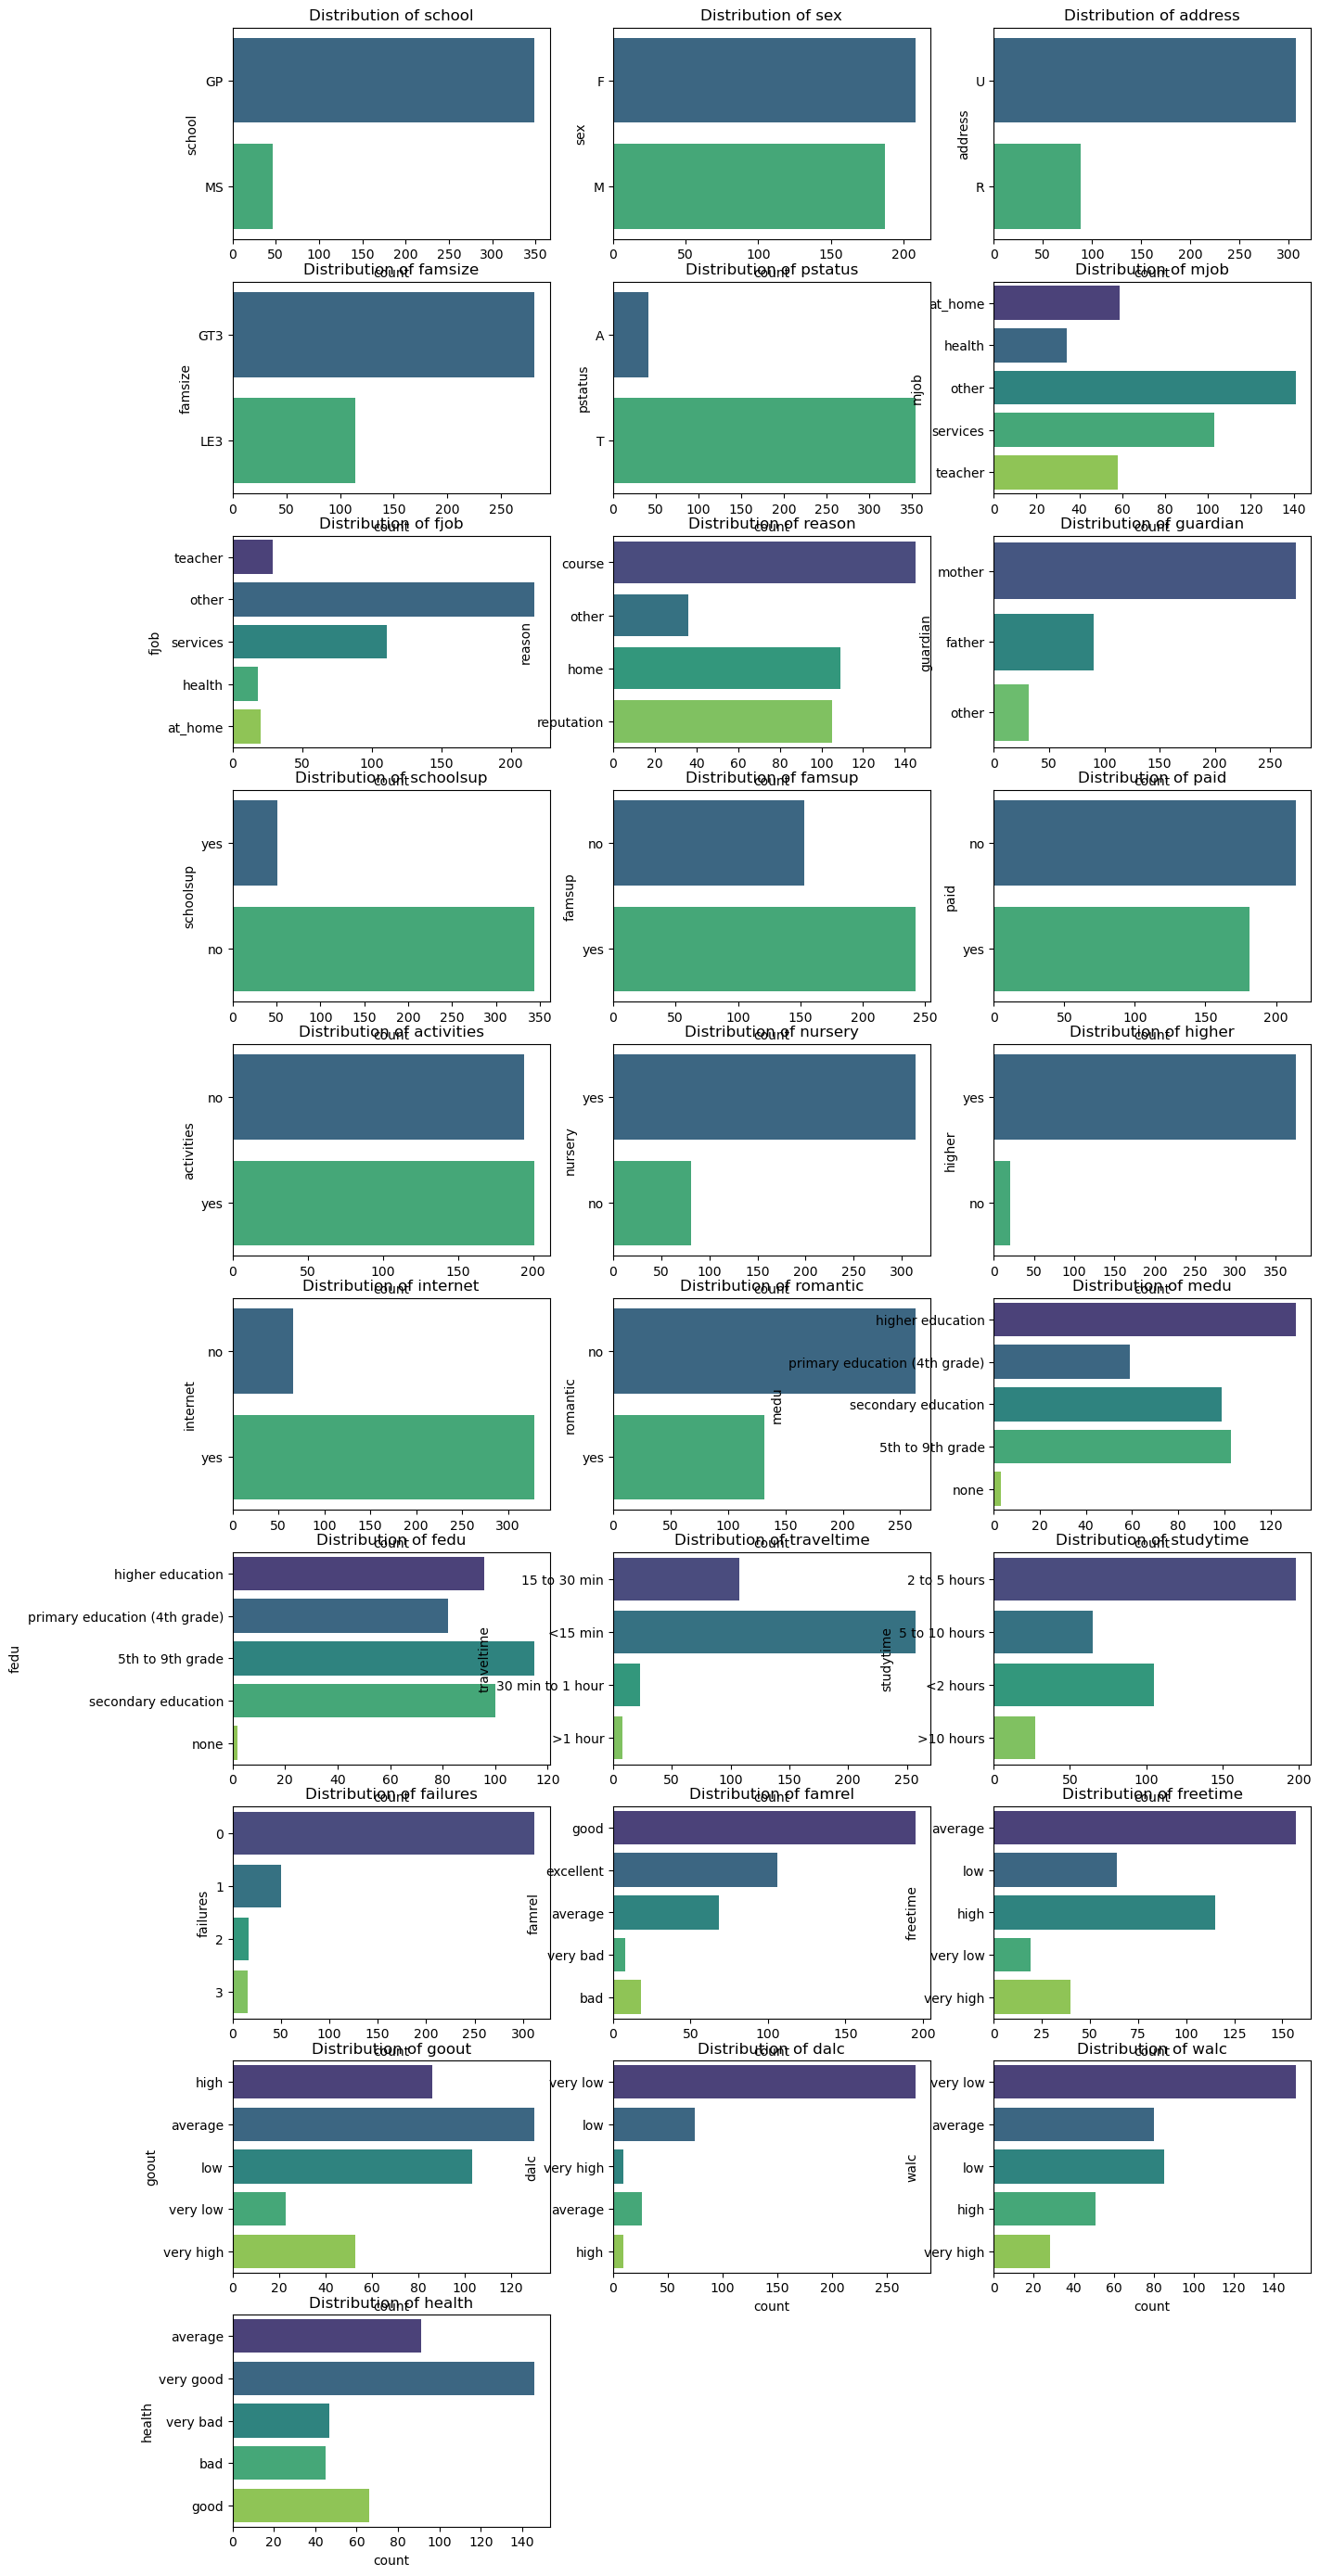

In [75]:
plt.figure(figsize=(15, 35))
for i, col in enumerate(new_categorical_cols):
    plt.subplot(10, 3, i + 1)
    sns.countplot(y=df_mat[col], palette='viridis')
    plt.title(f'Distribution of {col}')

#### Mutual Information

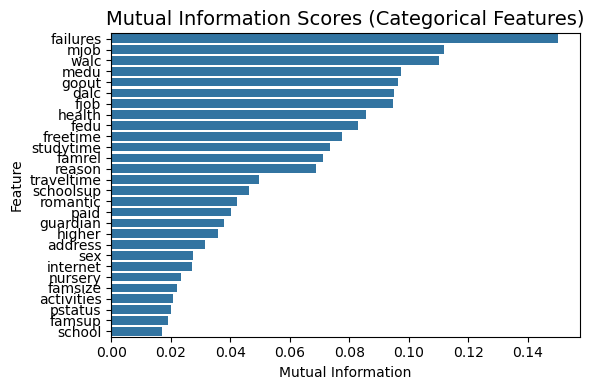

In [81]:
def mutual_info(series):
    return mutual_info_score(series, df_mat.g3.values)

mi = df_mat[new_categorical_cols].apply(mutual_info)
mi_sorted = mi.sort_values(ascending=False)
mi_df = mi_sorted.reset_index()
mi_df.columns = ['Feature', 'Mutual Information']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=mi_df, x='Mutual Information', y='Feature')
plt.title('Mutual Information Scores (Categorical Features)', fontsize=14)
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Mutual information (MI) is a measure of the mutual dependence between two variables. In this case, I use MI to evaluate the importance of categorical feature in predicting the target variable `g3`.
- `failures` has the strongest relationship with `g3`, meaning that the number of past class failures is a significant predictor of the final grade.
- `mjob` also has a significant relationship with `g3`, indicating that the mother's job may influence the student's academic performance.
- other features like `walc`, `medu`, `goout` contribute slightly but relatively weak to predicting `g3`.

## Setup validation framework

Split the data in train/val/test sets with 60%/20%/20% ratio.

In [76]:
df_full_train, df_test = train_test_split(df_mat, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.g3.values
y_val = df_val.g3.values
y_test = df_test.g3.values

del df_train['g3']
del df_val['g3']
del df_test['g3']

It's time to convert categorical variables into numerical variables by performing the appropriate transformation for the features in our dataset. This is because categorical variables cannot be used directly in machine learning models, so they need to be converted into numerical values. For this purpose, we will use the one-hot encoding method.

### One-hot encoding

In [77]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [78]:
dv.get_feature_names_out()

array(['absences', 'activities=no', 'activities=yes', 'address=R',
       'address=U', 'age', 'dalc=average', 'dalc=high', 'dalc=low',
       'dalc=very high', 'dalc=very low', 'failures', 'famrel=average',
       'famrel=bad', 'famrel=excellent', 'famrel=good', 'famrel=very bad',
       'famsize=GT3', 'famsize=LE3', 'famsup=no', 'famsup=yes',
       'fedu=5th to 9th grade', 'fedu=higher education', 'fedu=none',
       'fedu=primary education (4th grade)', 'fedu=secondary education',
       'fjob=at_home', 'fjob=health', 'fjob=other', 'fjob=services',
       'fjob=teacher', 'freetime=average', 'freetime=high',
       'freetime=low', 'freetime=very high', 'freetime=very low', 'g1',
       'g2', 'goout=average', 'goout=high', 'goout=low',
       'goout=very high', 'goout=very low', 'guardian=father',
       'guardian=mother', 'guardian=other', 'health=average',
       'health=bad', 'health=good', 'health=very bad', 'health=very good',
       'higher=no', 'higher=yes', 'internet=no', 'int

show dict representation of the first training example

In [ ]:
train_dicts[0]

{'school': 'GP',
 'sex': 'M',
 'age': 17,
 'address': 'U',
 'famsize': 'GT3',
 'pstatus': 'T',
 'medu': '5th to 9th grade',
 'fedu': 'primary education (4th grade)',
 'mjob': 'other',
 'fjob': 'other',
 'reason': 'home',
 'guardian': 'mother',
 'traveltime': '<15 min',
 'studytime': '<2 hours',
 'failures': 3,
 'schoolsup': 'no',
 'famsup': 'yes',
 'paid': 'no',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'yes',
 'romantic': 'no',
 'famrel': 'excellent',
 'freetime': 'high',
 'goout': 'very high',
 'dalc': 'very low',
 'walc': 'low',
 'health': 'very good',
 'absences': 0,
 'g1': 5,
 'g2': 0}

## Modelling

### Logistic Regression

In [108]:
final_results = []

In [109]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

final_results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Decision Tree

In [110]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_val = dt.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

final_results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest

In [111]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_val = model_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

final_results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### KNN

In [112]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_val = model_knn.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

final_results.append({
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

### SVM

In [113]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

y_pred_val = model_svm.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')
f1 = f1_score(y_val, y_pred_val, average='macro')

final_results.append({
    "Model": "Support Vector Machine",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
results_df = pd.DataFrame(final_results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.240506,0.207906,0.189048,0.188944
1,Decision Tree,0.392405,0.328998,0.332639,0.308731
2,Random Forest,0.303797,0.257037,0.231693,0.205695
3,K-Nearest Neighbors,0.291139,0.256086,0.225688,0.214089
4,Support Vector Machine,0.215190,0.073430,0.163095,0.086518


## Hyperparameter tuning

I use Grid Search Cross-Validation for hyperparameter tuning to improve the model's performance

### Logistic Regression

In [115]:
param_grid_lr = {
    'C': [0.005, 0.01, 0.1, 1, 5, 10, 100],
    'max_iter': [500, 1000,1500],
    'class_weight': ['balanced', None]
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid = param_grid_lr,
    scoring = 'balanced_accuracy',
    cv = 5, 
    n_jobs = -1,
    verbose = 0
)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

y_pred_lr = best_lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_lr)
precision = precision_score(y_val, y_pred_lr, average='macro')
recall = recall_score(y_val, y_pred_lr, average='macro')
f1 = f1_score(y_val, y_pred_lr, average='macro')

final_results.append({
    "Model": "Logistic Regression (Tuned)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

### Decision Tree

In [116]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20, 100],
    'class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid = param_grid_dt,
    scoring = 'balanced_accuracy',
    cv = 5,
    n_jobs = -1,
    verbose = 0
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt, average='macro')
recall = recall_score(y_val, y_pred_dt, average='macro')
f1 = f1_score(y_val, y_pred_dt, average='macro')

final_results.append({
    "Model": "Decision Tree (Tuned)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest

In [117]:
param_grid_rf = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_leaf": [1, 3, 5, 10],
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced", "balanced_subsample"]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf, average='macro')
recall = recall_score(y_val, y_pred_rf, average='macro')
f1 = f1_score(y_val, y_pred_rf, average='macro')

final_results.append({
    "Model": "Random Forest (Tuned)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: ylabel='None'>

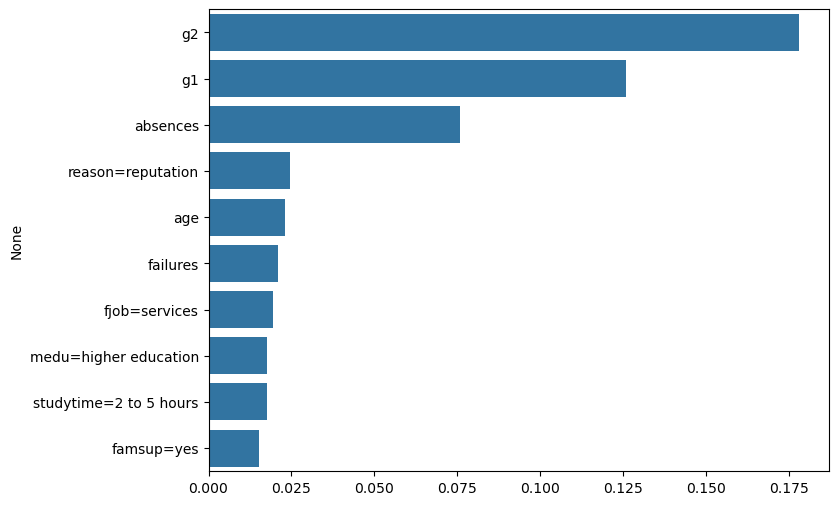

In [99]:
importances = best_rf.feature_importances_
feature_names = dv.get_feature_names_out()

# plot ten most important features
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]
sns.barplot(x=feature_importances.values, y=feature_importances.index)

As seen from the top-10 feature importance figure above, it indicates that `g2` and `g1` are the most important features for predicting the final grade `g3`. This aligns with our earlier observation from the correlation matrix, where `g2` and `g1` showed strong correlations with `g3`. Other features have significantly lower importance scores, suggesting that they contribute less to the model's predictions.

### KNN

In [118]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_knn)
precision = precision_score(y_val, y_pred_knn, average='macro')
recall = recall_score(y_val, y_pred_knn, average='macro')
f1 = f1_score(y_val, y_pred_knn, average='macro')

final_results.append({
    "Model": "K-Nearest Neighbors (Tuned)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


### SVM

In [119]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid_svm,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

y_pred_svm = best_svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm, average='macro')
recall = recall_score(y_val, y_pred_svm, average='macro')
f1 = f1_score(y_val, y_pred_svm, average='macro')

final_results.append({
    "Model": "Support Vector Machine (Tuned)",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
final_results_df = pd.DataFrame(final_results)
final_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.240506,0.207906,0.189048,0.188944
1,Decision Tree,0.392405,0.328998,0.332639,0.308731
2,Random Forest,0.303797,0.257037,0.231693,0.205695
3,K-Nearest Neighbors,0.291139,0.256086,0.225688,0.214089
4,Support Vector Machine,0.215190,0.073430,0.163095,0.086518
5,Logistic Regression (Tuned),0.291139,0.210450,0.227852,0.213839
6,Decision Tree (Tuned),0.493671,0.421667,0.453413,0.413522
7,Random Forest (Tuned),0.303797,0.228497,0.224901,0.221038
8,K-Nearest Neighbors (Tuned),0.291139,0.256086,0.225688,0.214089
9,Support Vector Machine (Tuned),0.430380,0.381700,0.408016,0.375460


### Final Model

The table above shows the model performance befoer and after hyperparameter tuning.

- *Decision Tree* performs the best among all models both before and after hyperparameter tuning
- *SVM* shows significant improvement after hyperparameter tuning, moving from the lowest accuracy to the second highest
- Tuning did not improve Random Forest and KNN models, indicating that their default parameters were already optimal for this dataset

In [121]:
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [125]:
grid_dt.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

## Write DTree Model

In [126]:
import pickle

output_file = 'dtree_model.pkl'
with open(output_file, 'wb') as f_out:
    pickle.dump((best_dt, dv), f_out)

f_out.close()